# Proyecto # 1 - 1a Parte
## Product Development - Ing. Preng Biba
### Hugo Brian Bay Rojas - Carnet 20002544

## 3. Variable Selection

In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from scipy.special import inv_boxcox

import joblib

In [65]:
X_train = pd.read_csv("preprocess_data/prep_Xtrain.csv")
X_test = pd.read_csv("preprocess_data/prep_Xtest.csv")

In [66]:
X_train.head()

,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1.0,0.234155,0.714286,0.333333,0.458371,0.500000,1.0,1.0,0.333333,0.111111,...,0.569832,0.0,0.0,0.0,0.0,0.926364,0.294952,0.371902,0.171028,0.479338
1,1.0,0.443660,0.857143,0.583333,0.478988,0.666667,1.0,1.0,0.333333,0.444444,...,0.000000,0.0,0.0,0.0,0.0,0.820284,0.762350,0.598443,0.358717,0.677631
2,1.0,0.812883,0.714286,0.416667,0.614334,0.500000,1.0,1.0,0.333333,0.333333,...,0.000000,1.0,0.0,0.0,0.0,0.353043,0.445682,0.710622,0.733449,0.579626
3,1.0,0.312822,0.857143,0.333333,0.646791,0.666667,1.0,1.0,0.000000,0.000000,...,0.956704,0.0,0.0,0.0,0.0,0.193803,0.762350,0.598443,0.733449,0.641945
4,1.0,0.578905,0.857143,0.416667,0.485857,0.666667,1.0,1.0,0.333333,0.111111,...,0.000000,0.0,0.0,0.0,0.0,0.859074,0.743478,0.562093,0.291145,0.579388


In [67]:
y_train = pd.read_csv("preprocess_data/prep_ytrain.csv")
y_test = pd.read_csv("preprocess_data/prep_ytest.csv")

y_train.head()

,Salary
0,23.713536
1,22.570759
2,21.707612
3,22.785080
4,23.744414


In [68]:
#objeto selector de variables
sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [69]:
print('Cantidad de variables seleccionadas:', sel_.get_support().sum())

Cantidad de variables seleccionadas: 29


In [70]:
selected_features = X_train.columns[(sel_.get_support())]
selected_features

Index(['Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism'],
      dtype='object')

In [71]:
pd.Series(selected_features).to_csv('preprocess_data/selected_features.csv', index=False)

## 4. Entrenamiento del modelo

In [72]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [73]:
from sklearn.model_selection import GridSearchCV

### 4.1. Grid Search y Cross Validation

#### 4.1.1. Regresión de Lasso

In [74]:
Lasso_model = GridSearchCV(Lasso(), {'alpha':[0.001,0.01,0.1,1.0,5]}, cv=10, scoring='r2').fit(X_train, y_train)
LassoResults = pd.DataFrame(Lasso_model.cv_results_)
LassoResults.sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score']]

,rank_test_score,params,mean_test_score
0,1,{'alpha': 0.001},0.211087
1,2,{'alpha': 0.01},0.203007
2,3,{'alpha': 0.1},-0.006432
3,3,{'alpha': 1.0},-0.006432
4,3,{'alpha': 5},-0.006432


#### 4.1.2. Regresión de Ridge

In [75]:
Ridge_model = GridSearchCV(Ridge(), {'alpha':[1,5,10,20,40]}, cv=10, scoring='r2').fit(X_train, y_train)
RidgeResults = pd.DataFrame(Ridge_model.cv_results_)
RidgeResults.sort_values("rank_test_score", ascending=True)[['rank_test_score', 'params', 'mean_test_score']]

,rank_test_score,params,mean_test_score
2,1,{'alpha': 10},0.212469
1,2,{'alpha': 5},0.212443
0,3,{'alpha': 1},0.210973
3,4,{'alpha': 20},0.210453
4,5,{'alpha': 40},0.203757


### 4.2. Evaluación de mejores parámetros de cada modelo

#### 4.2.1. Ridge

In [76]:
Ridge_final = Ridge(alpha=10).fit(X_train, y_train)

In [77]:
param_boxcox = joblib.load('preprocess_data/boxcox_y.joblib')

In [78]:
preds_ridge = Ridge_final.predict(X_train)
print("MSE de Entrenamiento: {}".format(mean_squared_error(inv_boxcox(y_train, param_boxcox), inv_boxcox(preds_ridge, param_boxcox))))
print("RMSE de Entrenamiento: {}".format(mean_squared_error(inv_boxcox(y_train, param_boxcox), inv_boxcox(preds_ridge, param_boxcox), squared=False)))
print("R2 de Entrenamiento: {}".format(r2_score(inv_boxcox(y_train, param_boxcox), inv_boxcox(preds_ridge, param_boxcox))))

MSE de Entrenamiento: 36751502690.23797
RMSE de Entrenamiento: 191706.81440741217
R2 de Entrenamiento: 0.1098787906354618


#### 4.2.2. Lasso

In [79]:
Lasso_final = Lasso(alpha=0.001).fit(X_train, y_train)

In [80]:
preds_lasso = Lasso_final.predict(X_train)
print("MSE de Entrenamiento: {}".format(mean_squared_error(inv_boxcox(y_train, param_boxcox), inv_boxcox(preds_lasso, param_boxcox))))
print("RMSE de Entrenamiento: {}".format(mean_squared_error(inv_boxcox(y_train, param_boxcox), inv_boxcox(preds_lasso, param_boxcox), squared=False)))
print("R2 de Entrenamiento: {}".format(r2_score(inv_boxcox(y_train, param_boxcox), inv_boxcox(preds_lasso, param_boxcox))))

MSE de Entrenamiento: 36681244084.76896
RMSE de Entrenamiento: 191523.48181037477
R2 de Entrenamiento: 0.11158045370473668


#### 4.2.3. Linear Regression

In [81]:
lm_model = LinearRegression().fit(X_train, y_train)

In [82]:
preds_lm = lm_model.predict(X_train)
print("MSE de Entrenamiento: {}".format(mean_squared_error(inv_boxcox(y_train, param_boxcox), inv_boxcox(preds_lm, param_boxcox))))
print("RMSE de Entrenamiento: {}".format(mean_squared_error(inv_boxcox(y_train, param_boxcox), inv_boxcox(preds_lm, param_boxcox), squared=False)))
print("R2 de Entrenamiento: {}".format(r2_score(inv_boxcox(y_train, param_boxcox), inv_boxcox(preds_lm, param_boxcox))))

MSE de Entrenamiento: 36598748973.14693
RMSE de Entrenamiento: 191307.99505809194
R2 de Entrenamiento: 0.11357848489117772


El modelo con mejor performance es el de regresión linea, por lo que ese será nuestro modelo final

### 4.3. Predicciones y evaluación del modelo

In [83]:
preds_test = lm_model.predict(X_test)
print("MSE de Entrenamiento: {}".format(mean_squared_error(inv_boxcox(y_test, param_boxcox), inv_boxcox(preds_test, param_boxcox))))
print("RMSE de Entrenamiento: {}".format(mean_squared_error(inv_boxcox(y_test, param_boxcox), inv_boxcox(preds_test, param_boxcox), squared=False)))
print("R2 de Entrenamiento: {}".format(r2_score(inv_boxcox(y_test, param_boxcox), inv_boxcox(preds_test, param_boxcox))))

MSE de Entrenamiento: 47491969507.582794
RMSE de Entrenamiento: 217926.52318518457
R2 de Entrenamiento: 0.11780331309937797


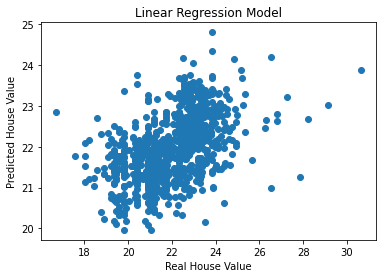

In [84]:
plt.scatter(y_test, preds_test)
plt.xlabel("Real House Value")
plt.ylabel("Predicted House Value")
plt.title("Linear Regression Model")
plt.show()

In [86]:
joblib.dump(lm_model, 'final_model/linear_reg.joblib')

['final_model/linear_reg.joblib']